In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install keras-bert

In [ ]:
import os
os.environ['TF_KERAS'] = '1'    # Required to use tensorflow.python.keras with keras-bert

In [ ]:
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
    print('We will use the GPU:', device_name)
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0
We will use the GPU: /device:GPU:0


In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_file.txt', sep='{}{}{}', engine = 'python')
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_file.txt", sep= '{}{}{}', engine = 'python')

#from sklearn.model_selection import train_test_split

train, val =  train,test

In [ ]:
# Give -nc (--no-clobber) argument so that the file isn't downloaded multiple times 
!wget -nc https://storage.googleapis.com/bert_models/2018_10_18/cased_L-12_H-768_A-12.zip

File ‘cased_L-12_H-768_A-12.zip’ already there; not retrieving.



In [ ]:
# Give -n argument so that existing files aren't overwritten 
!unzip -n cased_L-12_H-768_A-12.zip

Archive:  cased_L-12_H-768_A-12.zip


In [ ]:
bert_vocab_path = 'cased_L-12_H-768_A-12/vocab.txt'
bert_config_path = 'cased_L-12_H-768_A-12/bert_config.json'
bert_checkpoint_path = 'cased_L-12_H-768_A-12/bert_model.ckpt'    # suffixes not required

In [ ]:
model_is_cased = True

In [ ]:
from sklearn.utils import shuffle

train = shuffle(train)
train.head()

,Label,Text
14448,__label__df,I know that sounds silly. I have always been t...
1562,__label__ss,Legends of the Maori The Taniwha -- The Landi...
13887,__label__sr,'Supersub' Is Not A Slur Edin Edin Dzeko may ...
5137,__label__ne,Cookies on the IWCP website This website uses...
11001,__label__ds,Bradford Theatres would like to make you aware...


In [ ]:
vocabulary = []
with open(bert_vocab_path) as f:
    for i, line in enumerate(f):
        vocabulary.append(line.rstrip('\n'))    # rstrip to remove newline characters


# Print a list with every 100th vocabulary item
print(vocabulary[0::100])
print(len(vocabulary))

['[PAD]', '[UNK]', '¡', 'İ', 'Θ', 'щ', 'ک', 'ი', '⁰', 'く', '吉', '－', '##er', 'four', 'got', 'told', 'James', 'position', 'someone', 'director', 'space', 'hear', '##ized', 'Force', 'property', 'operations', 'Irish', 'selected', 'Line', 'native', 'proposed', 'Will', 'ones', 'account', 'concept', 'Oxford', 'tight', 'Historic', 'Junior', 'Cambridge', 'showing', 'Ford', 'Round', 'institutions', 'usual', 'domestic', 'solid', 'hockey', 'Design', 'shock', 'mountains', '##tta', 'presidential', 'signs', 'gate', 'commission', 'rates', '##gs', '##ess', 'heritage', 'voices', 'gonna', 'Stars', 'exit', 'LP', 'associate', 'stress', 'experimental', 'merchant', 'Chart', 'hills', 'brings', '##war', 'clinical', 'manufacturer', 'Guide', 'coaching', 'wire', 'Sophie', 'Voice', 'relaxed', 'planted', 'connects', 'owns', 'threatening', 'Page', 'examined', 'Casey', 'Armstrong', '##RS', 'Heights', 'resource', '1830', 'Joey', '##ination', 'singers', 'desperately', 'halt', 'Ho', '##ander', 'Interior', 'explaining',

In [ ]:
from pprint import pprint    # pretty-printer for output
import json

with open(bert_config_path) as f:
    config = json.load(f)


# Print configuration contents
pprint(config)

{'attention_probs_dropout_prob': 0.1,
 'hidden_act': 'gelu',
 'hidden_dropout_prob': 0.1,
 'hidden_size': 768,
 'initializer_range': 0.02,
 'intermediate_size': 3072,
 'max_position_embeddings': 512,
 'num_attention_heads': 12,
 'num_hidden_layers': 12,
 'type_vocab_size': 2,
 'vocab_size': 28996}


In [ ]:
import random
# Create mapping from vocabulary items to their indices in the vocabulary
token_dict = { v: i for i, v in enumerate(vocabulary) }


# Print some random examples of the mapping
pprint(dict(random.choices(list(token_dict.items()), k=15)))

{'##ydro': 19694,
 'Chen': 8742,
 'Romani': 27876,
 'Samson': 19893,
 'Tan': 13880,
 'additional': 2509,
 'crime': 3755,
 'improve': 4607,
 'infringement': 23040,
 'leveled': 25569,
 'reel': 24548,
 'resembling': 16562,
 'trapped': 7333,
 'wicket': 13386,
 'ো': 668}


In [ ]:
from keras_bert import Tokenizer


tokenizer = Tokenizer(token_dict, cased=model_is_cased)


# Let's test that out
for s in ['I am doing my NLP thesis']:
    print('Original string:', s)
    print('Tokenized:', tokenizer.tokenize(s))
    indices, segments = tokenizer.encode(s, max_len=20)    # max_len for padding and truncation
    print('Encoded:', indices)
    print('Segments:', segments)
    print('Decoded:', ' '.join(tokenizer.decode(indices)))
    print()

Original string: I am doing my NLP thesis
Tokenized: ['[CLS]', 'I', 'am', 'doing', 'my', 'NL', '##P', 'thesis', '[SEP]']
Encoded: [101, 146, 1821, 1833, 1139, 21239, 2101, 9593, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Decoded: I am doing my NL ##P thesis



In [ ]:
#print(train['Text'].values[17587])
len(tokenizer.tokenize(train['Text'].values[17587]))

7624

In [ ]:
train.head()
train['Label'].values

array(['__label__df', '__label__ss', '__label__sr', ..., '__label__sr',
       '__label__sr', '__label__ne'], dtype=object)

In [ ]:
#Label encoding the label columns

label_encode = {}
for i, v  in enumerate(train['Label'].unique()):
  label_encode[v] = i
label_encode

{'__label__av': 13,
 '__label__df': 0,
 '__label__dp': 12,
 '__label__ds': 4,
 '__label__dt': 9,
 '__label__en': 15,
 '__label__fi': 18,
 '__label__fs': 25,
 '__label__ha': 21,
 '__label__ht': 11,
 '__label__ib': 20,
 '__label__it': 19,
 '__label__ne': 3,
 '__label__ob': 5,
 '__label__pb': 10,
 '__label__po': 23,
 '__label__qa': 6,
 '__label__ra': 14,
 '__label__re': 8,
 '__label__rs': 16,
 '__label__rv': 7,
 '__label__sl': 17,
 '__label__sr': 2,
 '__label__ss': 1,
 '__label__tb': 22,
 '__label__tv': 24}

In [ ]:
train['Label_enc'] = train['Label'].map(label_encode)
val['Label_enc'] = val['Label'].map(label_encode)
train.head()

,Label,Text,Label_enc
14448,__label__df,I know that sounds silly. I have always been t...,0
1562,__label__ss,Legends of the Maori The Taniwha -- The Landi...,1
13887,__label__sr,'Supersub' Is Not A Slur Edin Edin Dzeko may ...,2
5137,__label__ne,Cookies on the IWCP website This website uses...,3
11001,__label__ds,Bradford Theatres would like to make you aware...,4


In [ ]:
print("Training Set Shape :", train.shape)
print("Test Set Shape :", val.shape)

Training Set Shape : (17588, 3)
Test Set Shape : (2210, 3)


In [ ]:
#Get value counts of each classes

train['Label_enc'].value_counts()

3     5577
2     1711
5     1445
0     1268
10    1203
9     1108
7      802
6      638
11     586
4      482
17     369
15     326
16     323
14     294
20     236
13     222
12     213
19     193
21     145
1      129
22      90
8       89
18      76
23      38
25      16
24       9
Name: Label_enc, dtype: int64

In [ ]:
# Separate the dataset for the purpose of upsampling and downsampling based on threshold of 802

trainDown = train[train['Label_enc'].map(train['Label_enc'].value_counts()) >= 802]
trainUp = train[train['Label_enc'].map(train['Label_enc'].value_counts()) <= 802]
#trainUp['Label_enc'].value_counts()

In [ ]:
# Separate the dataset for the purpose of upsampling and downsampling based on threshold of 802

trainDown = train[train['Label_enc'].map(train['Label_enc'].value_counts()) >= 802]
trainUp = train[train['Label_enc'].map(train['Label_enc'].value_counts()) <= 802]
#trainUp['Label_enc'].value_counts()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state = 0)

X_down, y_down = rus.fit_resample(trainDown,trainDown['Label_enc'])
X_up, u_up = ros.fit_resample(trainUp, trainUp['Label_enc'])
# X_down, y_down = rus.fit_resample(trainDown['Text'], trainDown['Label'])
# X_up, u_up = ros.fit_resample(trainUp['Text'], trainUp['Label'])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
Xd = pd.DataFrame(X_down, columns = ['Label','Text','Label_enc'])
#Xd=Xd[Xd.Label_enc != 6]
Xd['Label_enc'].value_counts()

10    802
9     802
7     802
5     802
3     802
2     802
0     802
Name: Label_enc, dtype: int64

In [ ]:
Xu = pd.DataFrame(X_up, columns = ['Label','Text','Label_enc'])
Xu['Label_enc'].value_counts()

25    802
24    802
4     802
6     802
7     802
8     802
11    802
12    802
13    802
14    802
15    802
16    802
17    802
18    802
19    802
20    802
21    802
22    802
23    802
1     802
Name: Label_enc, dtype: int64

In [ ]:
Xu = Xu[Xu.Label_enc != 7]
Xu['Label_enc'].value_counts()

25    802
15    802
4     802
6     802
8     802
11    802
12    802
13    802
14    802
16    802
24    802
17    802
18    802
19    802
20    802
21    802
22    802
23    802
1     802
Name: Label_enc, dtype: int64

In [ ]:
new_df = pd.concat([Xd,Xu]).reset_index(drop=True)
new_df['Label_enc'].value_counts()

25    802
24    802
1     802
2     802
3     802
4     802
5     802
6     802
7     802
8     802
9     802
10    802
11    802
12    802
13    802
14    802
15    802
16    802
17    802
18    802
19    802
20    802
21    802
22    802
23    802
0     802
Name: Label_enc, dtype: int64

In [ ]:
import numpy as np


train_token_indices, train_segment_ids = [], []  #bert tokenizer indices and their segment ids  (to separate sequences)
val_token_indices, val_segment_ids = [], []
for text in train['Text'].values:
    # tokenizer.encode() returns a sequence of token indices
    # and a sequence of segment IDs. BERT expects both as input,
    # even if the segments IDs are just all zeros (like here).
    ttid, tsid = tokenizer.encode(text, max_len=256)
    train_token_indices.append(ttid)
    train_segment_ids.append(tsid)

for text in test['Text'].values:
    # tokenizer.encode() returns a sequence of token indices
    # and a sequence of segment IDs. BERT expects both as input,
    # even if the segments IDs are just all zeros (like here).
    vtid, vsid = tokenizer.encode(text, max_len=256)
    val_token_indices.append(vtid)
    val_segment_ids.append(vsid)

# Format input as list of two numpy arrays
train_X = [np.array(train_token_indices), np.array(train_segment_ids)]
val_X = [np.array(val_token_indices), np.array(val_segment_ids)]


# Print some examples
# print('Token indices:')
# print(val_X[0][:2])
# print('Decoded:')
# for i in val_X[0][:2]:
#     print(tokenizer.decode(list(i)))
# print('Segment ids:')
# print(val_X[1][:2])
# print()
# print()

# print('Token indices:')
# print(train_X[0][:2])
# print('Decoded:')
# for i in train_X[0][:2]:
#     print(tokenizer.decode(list(i)))
# print('Segment ids:')
# print(train_X[1][:2])

In [ ]:
from keras_bert import load_trained_model_from_checkpoint


pretrained_model = load_trained_model_from_checkpoint(
    config_file = bert_config_path,
    checkpoint_file = bert_checkpoint_path,
    training = False,
    trainable = True,
    seq_len = 256
)

In [ ]:
# This is a keras model, so we can figure out what inputs it takes like so:
pretrained_model.inputs

[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'Input-Token')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'Input-Segment')>]

In [ ]:
# And similarly for outputs:
pretrained_model.outputs

[<KerasTensor: shape=(None, 256, 768) dtype=float32 (created by layer 'Encoder-12-FeedForward-Norm')>]

In [ ]:
#@title Default title text

pretrained_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 256)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 256, 768), ( 22268928    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 256, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

In [ ]:
# model.outputs is a list, here with a single item. Here
# pretrained_model.outputs[0] just grabs that item (the output tensor).
# Indxing that tensor with [:,0] gives the first position in the sequence
# for all elements in the batch (the `:`).
bert_out = pretrained_model.outputs[0][:,0]

print(bert_out)

KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='tf.__operators__.getitem/strided_slice:0', description="created by layer 'tf.__operators__.getitem'")


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
#num_labels = 26

dropout_layer = Dropout(.5, input_shape=(768,))(bert_out)
out = Dense(26, activation='softmax')(dropout_layer)
model = Model(
    inputs=pretrained_model.inputs,
    outputs=[out]
)

In [ ]:
from keras_bert import calc_train_steps, AdamWarmup


# Calculate the number of steps for warmup
total_steps, warmup_steps = calc_train_steps(
    num_example=len(train['Text'].values),
    batch_size=8,
    epochs=3,
    warmup_proportion=0.1,
)

optimizer = AdamWarmup(
    total_steps,
    warmup_steps,
    lr=0.00002,
    epsilon=1e-6,
    weight_decay=0.01,
    weight_decay_pattern=['embeddings', 'kernel', 'W1', 'W2', 'Wk', 'Wq', 'Wv', 'Wo']
)

In [ ]:
from keras.metrics import sparse_categorical_accuracy
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

In [ ]:
Y = train['Label_enc'].values
Y

array([0, 1, 2, ..., 2, 2, 3])

In [ ]:
val_y = val['Label_enc'].values

In [ ]:
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/assets')
history = model.fit(
    train_X,
    Y,
    epochs=3,
    batch_size=8,
    validation_data= (val_X,val_y)
    
)

Epoch 1/3
2199/2199 [==============================] - 1414s 621ms/step - loss: 1.9550 - sparse_categorical_accuracy: 0.4806 - val_loss: 0.8663 - val_sparse_categorical_accuracy: 0.7421
Epoch 2/3
2199/2199 [==============================] - 1338s 609ms/step - loss: 0.6774 - sparse_categorical_accuracy: 0.8036 - val_loss: 0.8627 - val_sparse_categorical_accuracy: 0.7593
Epoch 3/3
2199/2199 [==============================] - 1279s 582ms/step - loss: 0.3781 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.8706 - val_sparse_categorical_accuracy: 0.7647


In [ ]:
train_X

[array([[  101,   146,  1221, ...,  1119,   112,   102],
        [  101, 15704,  1104, ...,  1284,  1163,   102],
        [  101,   112,  3198, ...,   119,   138,   102],
        ...,
        [  101, 25931,  2154, ...,     0,     0,     0],
        [  101,   160, 11607, ...,  1120,  1103,   102],
        [  101, 22412, 10224, ...,  1107,  3073,   102]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

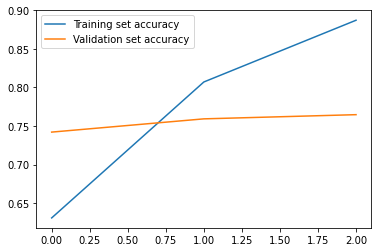

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt



def plot_history(history):
    plt.plot(history.history['sparse_categorical_accuracy'],label="Training set accuracy")
    plt.plot(history.history['val_sparse_categorical_accuracy'],label="Validation set accuracy")
    plt.legend()
    plt.show()


plot_history(history)

In [ ]:
model.evaluate(val_X,val_y)

In [2]:
### References

#University of Turku, Deep Learning in Human Language Technology lectures